# Assignment 1 - Data preprocessing and manual introspection

Load the data file

In [1]:
import pandas as pd

df = pd.read_csv('../data/ISLR/data/Wage.csv', index_col=0)

Display the number of features and their names

In [2]:
print(df.shape[1])
print(df.columns.values)

11
['year' 'age' 'maritl' 'race' 'education' 'region' 'jobclass' 'health'
 'health_ins' 'logwage' 'wage']


Delete the feature 'logwage' and display the number of features and their names again

In [3]:
df_without_logwage = df[list(filter(lambda name: name != 'logwage', df.columns.values))]

print(df_without_logwage.shape[1])
print(df_without_logwage.columns.values)

10
['year' 'age' 'maritl' 'race' 'education' 'region' 'jobclass' 'health'
 'health_ins' 'wage']


Display the number of datapoints

In [4]:
len(df_without_logwage)

3000

Display the data in a table

In [5]:
df_without_logwage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,75.043154


Print a statistic summary of the features (year, age, maritl, race, education, region, jobclass, health, health_ins) and the label (wage)

In [6]:
for column in df_without_logwage.columns.values:
    print(f'{df_without_logwage[column].describe()}\n')


# I don't know if this is sufficient. The pandas describe-function give less information about categorical columns.
# Especially for categorical features it might be better to show the distribution like:
    
from pandas.api.types import is_numeric_dtype

print(f'Categorical features')
for column in df_without_logwage.columns.values:
    if not is_numeric_dtype(df_without_logwage[column]):
        print(f'{df_without_logwage[column].value_counts()}\n')

count    3000.000000
mean     2005.791000
std         2.026167
min      2003.000000
25%      2004.000000
50%      2006.000000
75%      2008.000000
max      2009.000000
Name: year, dtype: float64

count    3000.000000
mean       42.414667
std        11.542406
min        18.000000
25%        33.750000
50%        42.000000
75%        51.000000
max        80.000000
Name: age, dtype: float64

count           3000
unique             5
top       2. Married
freq            2074
Name: maritl, dtype: object

count         3000
unique           4
top       1. White
freq          2480
Name: race, dtype: object

count           3000
unique             5
top       2. HS Grad
freq             971
Name: education, dtype: object

count                   3000
unique                     1
top       2. Middle Atlantic
freq                    3000
Name: region, dtype: object

count              3000
unique                2
top       1. Industrial
freq               1544
Name: jobclass, dtype: object

count

**For the numerical features**, check the correleations, i.e. the relation of feature to label variations.

Therefore, for **each** such feature perform the following steps:
1. Plot the feature against the label values
2. Test the normality of the features and lable values
3. Test their correlation using an appropriate test
4. Interprete the results

Import packages

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Step 1.: Plot the feature against the lable values

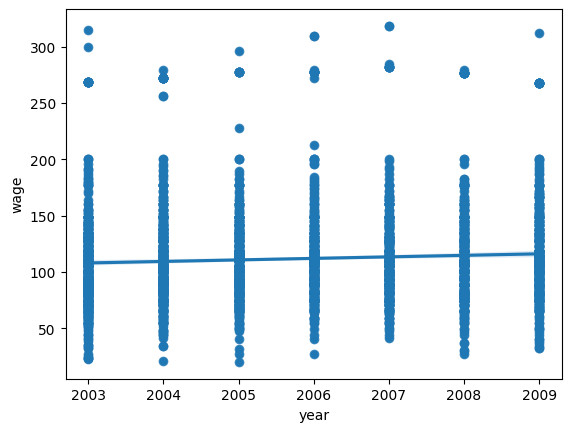

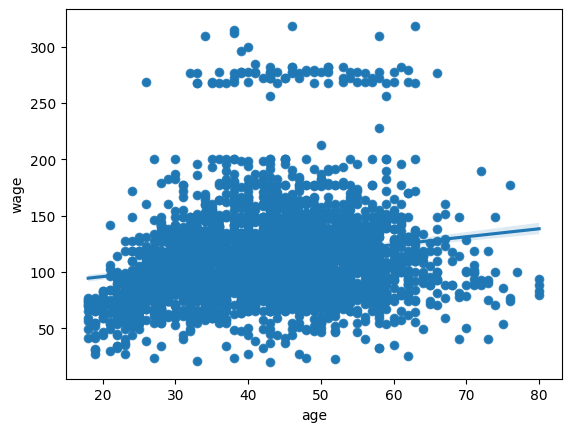

In [8]:
for feature in  df_without_logwage.columns.values[:-1]:
    if is_numeric_dtype(df_without_logwage[feature]):
        sns.scatterplot(df_without_logwage, x=feature, y='wage')
        sns.regplot(df_without_logwage, x=feature, y='wage')
        plt.show()

Step 2.: Test the normality of the feature and lable values

Import packages

In [9]:
from scipy import stats
import statsmodels.api as sm

data: year
W = 0.9111329317092896, p = 9.265225698090757e-39


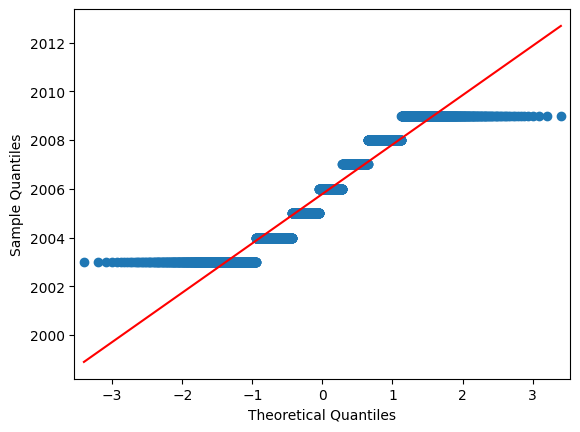

data: age
W = 0.9910550117492676, p = 9.393711936783733e-13


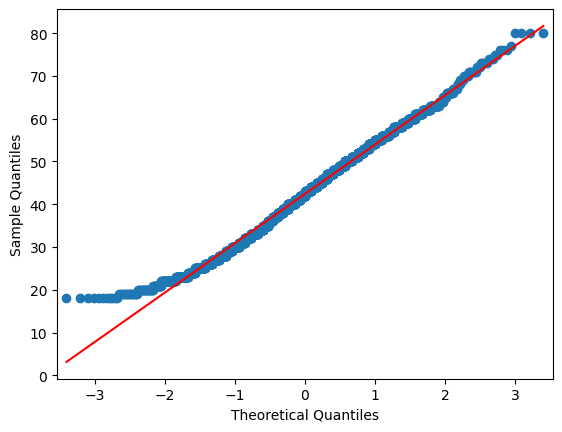

data: wage
W = 0.8795709013938904, p = 2.466285297211678e-43


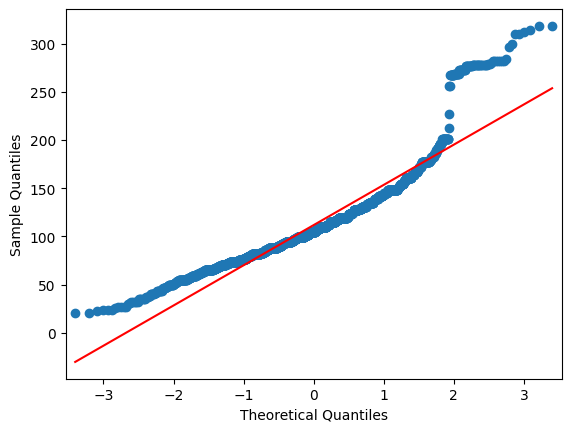

In [10]:
for feature in  df_without_logwage.columns.values:
    if is_numeric_dtype(df_without_logwage[feature]):
        feature_values = df_without_logwage[feature].values
        res_feature = stats.shapiro(feature_values)
        print(f'data: {feature}')
        print(f'W = {res_feature.statistic}, p = {res_feature.pvalue}')
        sm.qqplot(df_without_logwage[feature], line="s")
        plt.show()



Step 3.: Perform the pearson correleation test

In [11]:
for feature in  df_without_logwage.columns.values[:-1]:
    if is_numeric_dtype(df_without_logwage[feature]):
        feature_values = df_without_logwage[feature].values
        corr = stats.pearsonr(feature_values, df_without_logwage['wage'].values)
        print(f'Pearson correlation for: {feature} and wage')
        print(f'correlation = {corr.statistic}, p = {corr.pvalue}')
        conv_intervall = corr.confidence_interval(confidence_level=0.95)
        print(f'95% Confidence Interval: {conv_intervall.low} {conv_intervall.high}')
        print('\n')

Pearson correlation for: year and wage
correlation = 0.06554427797296275, p = 0.00032767779260475517
95% Confidence Interval: 0.02982774237850662 0.10109365222970776


Pearson correlation for: age and wage
correlation = 0.19563720156358866, p = 2.900777675211036e-27
95% Confidence Interval: 0.1609777345954281 0.2298147289885716




Step 4.: Interpretation

#### Year:
There is a very weak positive correlation between year and wage. Additionally there is no relationship that can be assumed even from the year-wage-scatter plot or the distributions of the feature and the label. So I would not select this feature in the ML model according to this analysis. 

#### Age:
The overall (positive) correlation between the age and the wage is a litte bit stronger, but still weak. However, looking at the scatter polt, there might exists two clusters, i.e. one for higher and one for lower wage. This is also indicated by the q-q-plot of the wage. Maybe there is a better correlation between age and wage if we focus on these clusters individual.


**For the non-numerical features**, analyse the variance (ANOVA), to study differences between
the means of the label values for groups of data points with the same feature value. Therefore, for
each such feature perform the following steps:
1. List the possible feature values
2. Plot (box plot) the label values for each group of of data points with the same feature value.
3. Perform the one way ANOVA test
4. Interprete the results

Step 1: List the possible feature values:

In [12]:
for feature in df_without_logwage.columns.values[:-1]:
    if not is_numeric_dtype(df_without_logwage[feature]):
        print(f'Feature: {feature}')
        print(f'Values: {df_without_logwage[feature].unique()}' )

Feature: maritl
Values: ['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']
Feature: race
Values: ['1. White' '3. Asian' '4. Other' '2. Black']
Feature: education
Values: ['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']
Feature: region
Values: ['2. Middle Atlantic']
Feature: jobclass
Values: ['1. Industrial' '2. Information']
Feature: health
Values: ['1. <=Good' '2. >=Very Good']
Feature: health_ins
Values: ['2. No' '1. Yes']


Step 2: Plot (box plot) the label values for each group of of data points with the same feature
value:

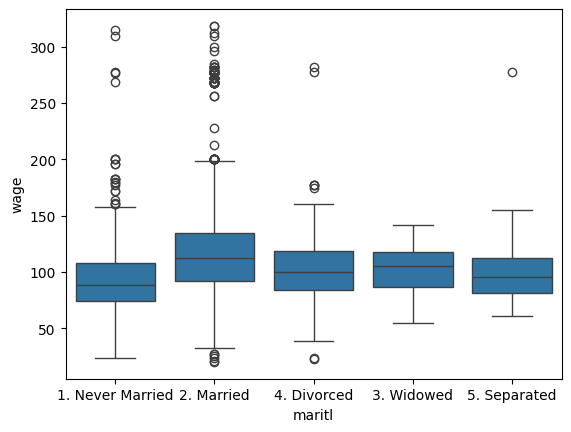

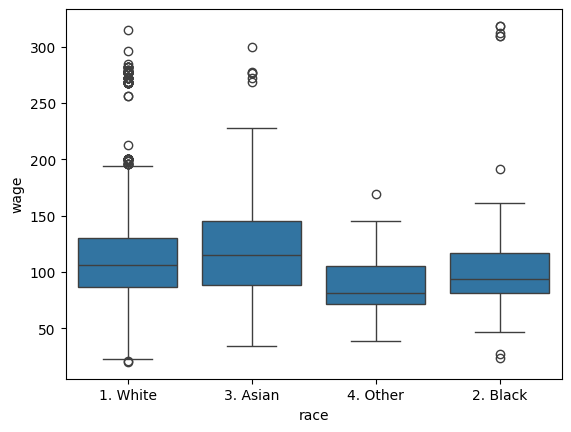

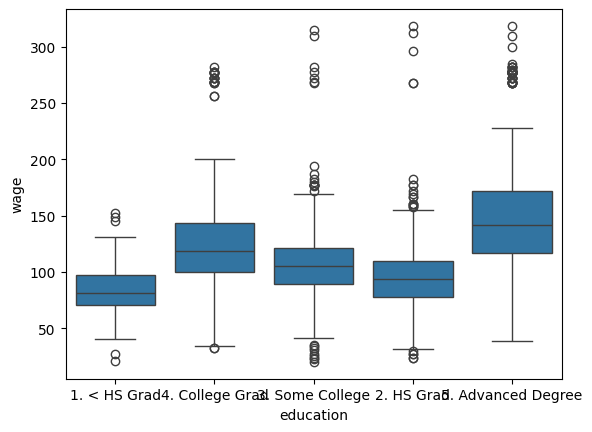

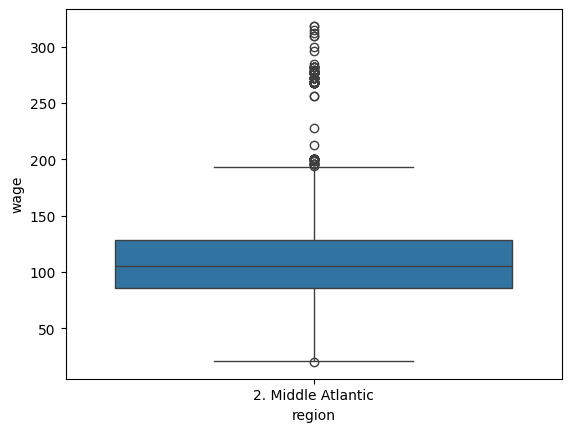

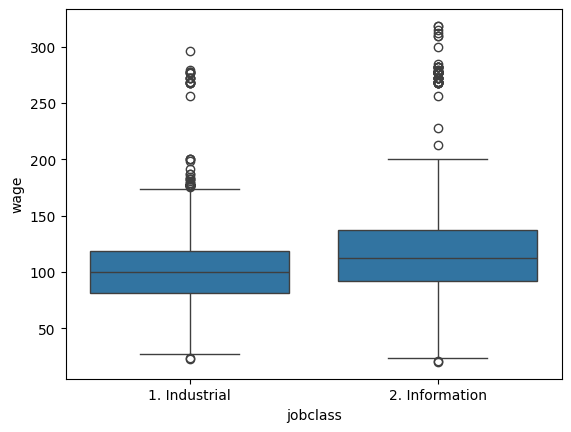

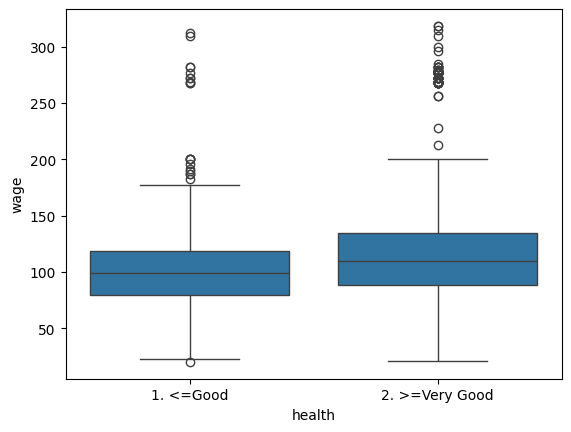

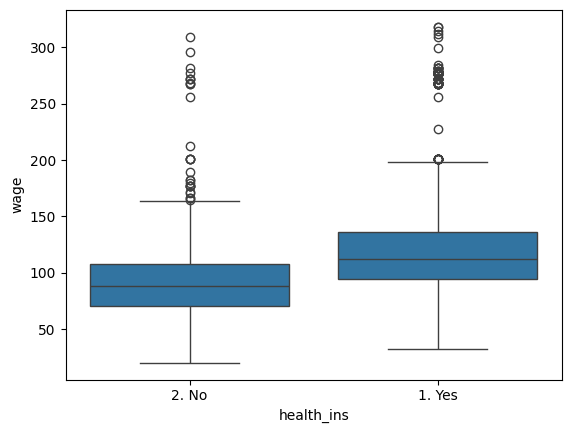

In [13]:
for feature in df_without_logwage.columns.values[:-1]:
    if not is_numeric_dtype(df_without_logwage[feature]):
        sns.boxplot(df_without_logwage, x=feature, y='wage')
        plt.show()

Step 3. Perform the one-way ANOVA test:

In [14]:
for feature in df_without_logwage.columns.values[:-1]:
    if not is_numeric_dtype(df_without_logwage[feature]):
        grouped_values = df_without_logwage[[feature, 'wage']].groupby(feature)['wage'].apply(list).values.tolist()
        print(f'Feature: {feature}')
        if len(grouped_values) < 2:
            print(f'ANOVA impossible due to less samples\n')
            continue
        res = stats.f_oneway(*grouped_values)
        I = len(df_without_logwage[feature].unique())
        N = len(df_without_logwage)
        print(N)
        df = I-1
        residuals = N-I
        print(f'statistic: {res.statistic}, p-value: {res.pvalue}, df: {df}, residuals: {residuals}\n')

Feature: maritl
3000
statistic: 55.95958463906133, p-value: 1.401201124160973e-45, df: 4, residuals: 2995

Feature: race
3000
statistic: 12.236674234711575, p-value: 5.890230292195143e-08, df: 3, residuals: 2996

Feature: education
3000
statistic: 229.80592053052388, p-value: 2.915931889600402e-172, df: 4, residuals: 2995

Feature: region
ANOVA impossible due to less samples

Feature: jobclass
3000
statistic: 134.07258457516087, p-value: 2.3081861116745258e-30, df: 1, residuals: 2998

Feature: health
3000
statistic: 71.22664064394343, p-value: 4.8864044831929634e-17, df: 1, residuals: 2998

Feature: health_ins
3000
statistic: 314.9079639235259, p-value: 4.465783160823236e-67, df: 1, residuals: 2998



Step 4: Interpretation

One of the assumtions when applying the ANOVA test is, that the samples are normally distributed. This condition is hard to match in the given statistic, since wage is not normally distributed. Like in the interpretation of the numerical features, it might be better to analyse the two clusters of low and high wage individual. Also the outliers one can see in the box plots of the non numerical features indicates, that the suggested splitting could makes sense.


Anyway, here the interpretation of the non numeric features according to the wage in general:

Since to the ANOVA tests tells, that the means of the groups of the non numeric features (except region) according to the wage are significant different (p-value < 0.05), I would consider using all non numeric features (expect region) as input for the ML model.
In order to keep the amount of relevant features low, one could consider to select those with a higher statistic, since that means, that the variance coming from the specific feature is higher than the variance coming from the impact of other variables.

Since there is only one unique value for the region, we can not derive any relevance for the estimation of the wage, based on the given statistical data. So it doesn't make sense to use it as an input for any ML model based on the given statistic.